In [2]:
#

BUSINESS = 'business'
ENTERTAINMENT = 'entertainment'
POLITICS = 'politics'
SPORT = 'sport'
TECH = 'tech'


SOURCES = [
    ('documents/bbc/business', BUSINESS),
    ('documents/bbc/entertainment', ENTERTAINMENT),
    ('documents/bbc/politics', POLITICS),
    ('documents/bbc/sport', SPORT),
    ('documents/bbc/tech', TECH),
]

In [3]:
#Importamos la librería pandas y damos formato al dataframe
from pandas import DataFrame
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
print(sys.executable)

data = DataFrame({'text':[], 'label':[]})

/home/Dair/anaconda3/bin/python


In [4]:
#importamos os
import os

In [5]:
#script para leer los archivos
def leerarchivos(path):
    archivos = os.listdir(path)
    for nombrearchivo in archivos:
        patharchivo = os.path.join(path, nombrearchivo)
        lineasdetexto = []
        f = open(patharchivo, encoding = "latin-1")
        for linea in f:
            lineasdetexto.append(linea)
        f.close()
        texto = '\n'.join(lineasdetexto)
    #print(texto)
    #patharchivo = ''
    #texto = ''
    #print(path)
    #archivos = os.listdir(path)
    #print(patharchivo)
    #print(archivos)

        yield patharchivo, texto

In [6]:
#script para construir el dataframe
def contruirdataframe(path, categories):
    filas = []
    index = []
    for pathdearchivo, texto in leerarchivos(path):
        filas.append({'text': texto, 'label': categories})
        index.append(pathdearchivo)
    dataframe = DataFrame(filas, index = index)
    return dataframe

In [7]:
for path, categories in SOURCES:
    data = data.append(contruirdataframe(path,categories))

In [8]:
#exploramos los datos
data.head()

,text,label
documents/bbc/business/276.txt,India power shares jump on debut\n\n\n\nShares...,business
documents/bbc/business/423.txt,Israel looks to US for bank chief\n\n\n\nIsrae...,business
documents/bbc/business/354.txt,Asia shares defy post-quake gloom\n\n\n\nThail...,business
documents/bbc/business/209.txt,Mixed reaction to Man Utd offer\n\n\n\nShares ...,business
documents/bbc/business/446.txt,US in EU tariff chaos trade row\n\n\n\nThe US ...,business


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2225 entries, documents/bbc/business/276.txt to documents/bbc/tech/390.txt
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2225 non-null   object
 1   label   2225 non-null   object
dtypes: object(2)
memory usage: 52.1+ KB


In [10]:
data.describe()

,text,label
count,2225,2225
unique,2127,5
top,Rings of steel combat net attacks\n\n\n\nGambl...,sport
freq,2,511


In [11]:
#data[data.index.duplicated()].isna()
data = data.reindex(np.random.permutation(data.index))

In [25]:
#Pre procesamos los datos
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
documentos = data['text'].values.astype("U")
vectorizer = CountVectorizer(stop_words='english')
features = vectorizer.fit_transform(documentos)
print(features.shape)

(2225, 29126)


In [27]:
#k = 20
#modelo = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=1)
#modelo.fit(features)

### CREAMOS DIFERENTES CLUSTERS CON 
### CEAMOS LA GRÁFICA DE CODO DE YAMBU
### PUNTO DONDE DEJA DE DISMINUIR DE FORMA DRASTICA - ESTE ES EL NÚMERO ÓPTIMO DE CLUSTERS
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, max_iter=300)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

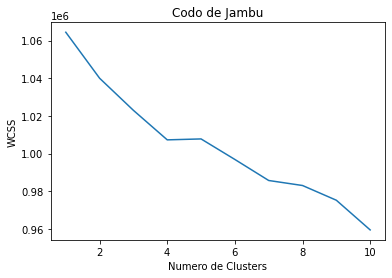

In [28]:
# GRÁFICAMOS EL COD DE YAMBU (ALGORITMO)
plt.plot(range(1,11), wcss)
plt.title("Codo de Jambu")
plt.xlabel("Numero de Clusters")
plt.ylabel("WCSS")
plt.show()

In [29]:
### CÁLCULO DE KMEANS CON EL NÚMERO DE CLUSTER ÓPTIMOS
kmeans = KMeans(n_clusters=9, max_iter=300)
kmeans.fit(features)
label = kmeans.predict(features)

In [30]:
data['cluster'] = kmeans.labels_

In [31]:
data

,text,label,cluster
documents/bbc/business/361.txt,US consumer confidence up\n\n\n\nConsumers' co...,business,2
documents/bbc/sport/249.txt,Solskjaer raises hopes of return\n\n\n\nManche...,sport,2
documents/bbc/politics/369.txt,BAA support ahead of court battle\n\n\n\nUK ai...,politics,2
documents/bbc/business/127.txt,Yukos owner sues Russia for $28bn\n\n\n\nThe m...,business,2
documents/bbc/politics/204.txt,Correction agency plans dropped\n\n\n\nPlans t...,politics,2
...,...,...,...
documents/bbc/entertainment/316.txt,Johnny Depp: The acting outlaw\n\n\n\nJohnny D...,entertainment,2
documents/bbc/sport/087.txt,GB quartet get cross country call\n\n\n\nFour ...,sport,2
documents/bbc/business/252.txt,BT offers equal access to rivals\n\n\n\nBT has...,business,7
documents/bbc/sport/132.txt,Republic to face China and Italy\n\n\n\nThe Re...,sport,1


In [32]:
kmeans.inertia_

967348.6176393918

In [33]:
centroides = kmeans.cluster_centers_.argsort()[:,::-1]
palabras = vectorizer.get_feature_names()
#print(' %s' % palabras[10])
for i in range(9):
    print("Cluster %d:"%i)
   # p = ''
    for j in centroides[i,:10]:
        print(' %s' % palabras[j])
    #    p+=palabras[j]+' '
    print('-------')
    #wordcloud = WordCloud().generate(p)
    #%pylab inline
    #plt.imshow(wordcloud, interpolation='bilinear')
    #plt.axis("off")

Cluster 0:
 roddick
 nadal
 set
 game
 break
 point
 serve
 winner
 hold
 points
-------
Cluster 1:
 said
 game
 england
 time
 win
 year
 players
 world
 half
 wales
-------
Cluster 2:
 said
 year
 new
 mr
 people
 world
 uk
 company
 000
 years
-------
Cluster 3:
 song
 best
 years
 25
 angels
 robbie
 music
 think
 british
 songs
-------
Cluster 4:
 said
 mr
 labour
 government
 election
 blair
 party
 people
 brown
 minister
-------
Cluster 5:
 gaming
 game
 games
 online
 time
 playing
 hours
 people
 play
 world
-------
Cluster 6:
 forsyth
 government
 mr
 people
 threat
 new
 agree
 terrorists
 like
 ira
-------
Cluster 7:
 said
 people
 music
 mobile
 technology
 mr
 digital
 new
 tv
 net
-------
Cluster 8:
 best
 film
 awards
 award
 won
 said
 director
 actor
 actress
 year
-------


In [34]:
pca = PCA(n_components=2, random_state=0)
pca_docs = pca.fit_transform(features.toarray())
pca_docs_df = pd.DataFrame(data=pca_docs, columns=['componente_1', 'componente_2'])

In [35]:
centroide_reducido = pca.transform(kmeans.cluster_centers_)

In [36]:
pca_docs_df['cluster'] = kmeans.labels_
pca_docs_df

,componente_1,componente_2,cluster
0,-2.314765,-0.614121,2
1,-3.488779,-0.548393,2
2,2.118997,-1.783533,2
3,2.151336,-2.314055,2
4,-1.250541,-0.357933,2
...,...,...,...
2220,-3.707364,2.106476,2
2221,-3.388958,-0.098399,2
2222,4.351668,-0.612598,7
2223,-3.653696,0.306793,1


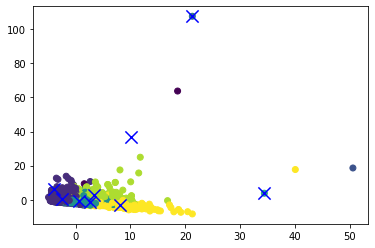

In [120]:
plt.scatter(pca_docs_df.iloc[:,0], pca_docs_df.iloc[:,1], c=kmeans.predict(features))
plt.scatter(centroide_reducido[:, 0], centroide_reducido[:,1], marker='x', s=150, c='b')

In [121]:
from sklearn.metrics import silhouette_score
silhouette_score(features, labels=kmeans.predict(features))

0.015691439713624255

In [39]:
Y = vectorizer.transform(["My cat is hungry."])
prediction = kmeans.predict(Y)
print(prediction)

[2]


In [123]:
data.to_excel("Salida.xlsx")